In [105]:
import torch
import torchaudio

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [83]:
waveform, sample_rate = torchaudio.load("../data/clips_45seconds/441.mp3", normalization = True)

In [84]:
sample_rate

44100

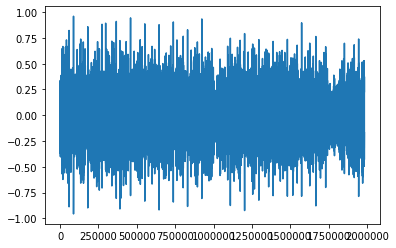

In [85]:
plt.figure()
plt.plot(waveform.t().numpy())

In [86]:
waveform.shape

torch.Size([1, 1982592])

Shape of spectrogram: torch.Size([1, 201, 501])


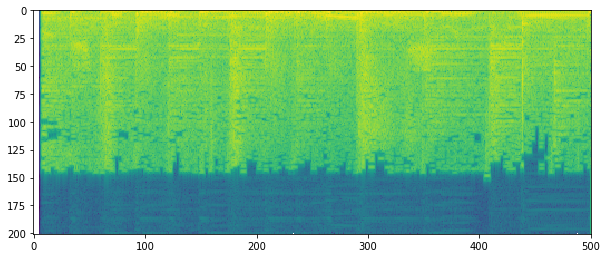

In [87]:
specgram = torchaudio.transforms.Spectrogram()(waveform[:,:100000])

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure(figsize = (10,10))
p = plt.imshow(specgram.log2()[0,:,:].detach().numpy())

Shape of spectrogram: torch.Size([1, 32, 3601])


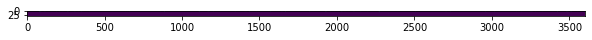

In [107]:
DOWNSAMPLED_RATE = 16000
Downsample = torchaudio.transforms.Resample(orig_freq = sample_rate, new_freq = DOWNSAMPLED_RATE)
MS = torchaudio.transforms.MelSpectrogram(sample_rate = DOWNSAMPLED_RATE, n_mels = 32)

specgram =  MS(Downsample(waveform))
print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure(figsize = (10,10))
p = plt.imshow(specgram[0,:,:].detach().numpy())

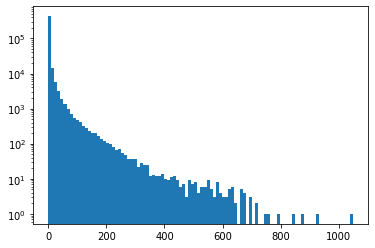

In [100]:
plt.hist(specgram.flatten(),log = True, bins = 100)
plt.show()

In [101]:
specgram.view(128, -1).numpy()

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 2.4219521e-03, ..., 7.5005512e+00,
        9.1962576e-02, 4.1248325e+01],
       [0.0000000e+00, 0.0000000e+00, 1.3040446e-02, ..., 4.0384998e+01,
        4.9515140e-01, 2.2209215e+02],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.1614761e-03, ..., 1.9630168e-02,
        2.2382010e-02, 4.4765793e-02],
       [0.0000000e+00, 0.0000000e+00, 2.2213506e-04, ..., 2.2493672e-02,
        1.1230555e-02, 8.5087493e-02],
       [0.0000000e+00, 0.0000000e+00, 3.5067275e-04, ..., 1.2152383e-02,
        1.2978496e-02, 4.2615697e-02]], dtype=float32)

In [102]:
np.savetxt("x.csv", specgram.view(128, -1).numpy(),  
              delimiter = ",")

In [108]:
DOWNSAMPLED_RATE = 16000
N_MELS = 32
Downsample = torchaudio.transforms.Resample(orig_freq = sample_rate, new_freq = DOWNSAMPLED_RATE)
MS = torchaudio.transforms.MelSpectrogram(sample_rate = DOWNSAMPLED_RATE, n_mels = N_MELS)

dfs = []

for i in tqdm(range(2, 1001)):
    waveform, sample_rate = torchaudio.load(f"../data/clips_45seconds/{i}.mp3", normalization = True)
    specgram =  MS(Downsample(waveform))
    np.savetxt(f"../data/mel_specgrams/{i}.csv", specgram.view(N_MELS, -1).numpy(),  
              delimiter = ",")

100%|██████████| 999/999 [1:03:51<00:00,  3.84s/it]


In [109]:
FRAME_SIZE = 0.5 * DOWNSAMPLED_RATE / 200
FRAME_SIZE

40.0

Shape of spectrogram: torch.Size([1, 40, 501])


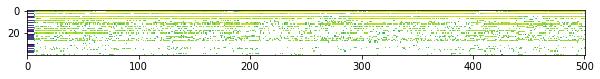

In [54]:
specgram = torchaudio.transforms.MFCC(sample_rate = sample_rate)(waveform[:,:100000])

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure(figsize = (10,10))
p = plt.imshow(specgram.log2()[0,:,:].detach().numpy())